In [30]:
# Cell 1: Initial Setup and Library Installation
print("🚀 Starting Enhanced Spam Detection System")
print("=" * 50)

# Install required libraries
print("📦 Installing required libraries...")

!pip install pandas numpy scikit-learn matplotlib seaborn joblib imbalanced-learn nltk wordcloud --quiet

print("✅ Basic libraries installed!")

# Now import everything
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

print("✅ Initial setup completed!")

🚀 Starting Enhanced Spam Detection System
📦 Installing required libraries...
✅ Basic libraries installed!
✅ Initial setup completed!


In [31]:
# Cell 2: NLTK Setup with Multiple Fallbacks
print("\n📥 Setting up NLTK for text processing...")

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download NLTK data with multiple attempts
def download_nltk_data():
    nltk_packages = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger']
    
    for package in nltk_packages:
        max_attempts = 3
        for attempt in range(max_attempts):
            try:
                print(f"📥 Downloading {package} (Attempt {attempt + 1}/{max_attempts})...")
                nltk.download(package, quiet=True)
                print(f"✅ {package} downloaded successfully")
                break
            except Exception as e:
                print(f"⚠️ Attempt {attempt + 1} failed: {str(e)}")
                if attempt == max_attempts - 1:
                    print(f"❌ Failed to download {package} after {max_attempts} attempts")
                    print(f"🔧 Using fallback methods for {package}")

download_nltk_data()

# Initialize NLP tools with fallbacks
try:
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    print("✅ NLTK tools initialized successfully")
    
except Exception as e:
    print(f"⚠️ NLTK initialization failed: {str(e)}")
    print("🔧 Using simplified text processing without NLTK")
    
    # Create basic stop words list
    stop_words = {
        'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
        'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
        'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
        'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
        'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
        'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
        'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
        'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
        'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
        'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
        'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
        'than', 'too', 'very', 'can', 'will', 'just', 'should', 'now'
    }
    
    # Simple lemmatizer replacement
    class SimpleLemmatizer:
        def lemmatize(self, word):
            return word.lower()
    
    lemmatizer = SimpleLemmatizer()

print("✅ NLTK setup completed!")


📥 Setting up NLTK for text processing...
📥 Downloading punkt (Attempt 1/3)...
✅ punkt downloaded successfully
📥 Downloading stopwords (Attempt 1/3)...
✅ stopwords downloaded successfully
📥 Downloading wordnet (Attempt 1/3)...
✅ wordnet downloaded successfully
📥 Downloading averaged_perceptron_tagger (Attempt 1/3)...
✅ averaged_perceptron_tagger downloaded successfully
✅ NLTK tools initialized successfully
✅ NLTK setup completed!


In [32]:
# Cell 3: Data Loading and Initial Exploration
print("\n📊 Loading and exploring the dataset...")

try:
    # Load the dataset
    df = pd.read_csv("spam.csv", encoding='latin-1')
    print("✅ Dataset loaded successfully!")
    
    # Display basic information
    print(f"\n🔍 Dataset Overview:")
    print(f"Shape: {df.shape} (rows, columns)")
    print(f"Columns: {df.columns.tolist()}")
    
    # Check for missing values
    print(f"\n📝 Missing Values Analysis:")
    missing_data = df.isnull().sum()
    for col, missing_count in missing_data.items():
        if missing_count > 0:
            print(f"   {col}: {missing_count} missing values ({missing_count/len(df)*100:.1f}%)")
    
    if missing_data.sum() == 0:
        print("   No missing values found!")
    
    # Display label distribution
    print(f"\n🎯 Label Distribution:")
    label_counts = df['type'].value_counts()
    for label, count in label_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   {label}: {count} emails ({percentage:.1f}%)")
    
    # Display first few rows
    print(f"\n👀 First 3 rows of the dataset:")
    print(df.head(3))
    
except FileNotFoundError:
    print("❌ ERROR: 'spam.csv' file not found!")
    print("💡 Please make sure the file is in the same directory as this script")
    # Create a dummy dataframe to prevent further errors
    import sys
    sys.exit("Stopping execution due to missing data file.")
    
except Exception as e:
    print(f"❌ ERROR loading dataset: {str(e)}")
    sys.exit("Stopping execution due to data loading error.")

print("✅ Data exploration completed!")


📊 Loading and exploring the dataset...
✅ Dataset loaded successfully!

🔍 Dataset Overview:
Shape: (84, 3) (rows, columns)
Columns: ['title', 'text', 'type']

📝 Missing Values Analysis:
   No missing values found!

🎯 Label Distribution:
   not spam: 58 emails (69.0%)
   spam: 26 emails (31.0%)

👀 First 3 rows of the dataset:
                             title  \
0        ?? the secrets to SUCCESS   
1  ?? You Earned 500 GCLoot Points   
2       ?? Your GitHub launch code   

                                                text      type  
0  Hi James,\n\nHave you claim your complimentary...      spam  
1  \nalt_text\nCongratulations, you just earned\n...  not spam  
2  Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
✅ Data exploration completed!


In [34]:
# Cell 4: Advanced Text Preprocessing
print("\n🔧 Starting text preprocessing...")

def robust_text_preprocessing(text):
    """
    Comprehensive text preprocessing with multiple fallback methods
    """
    if not isinstance(text, str) or text.strip() == "":
        return ""
    
    try:
        # Convert to lowercase
        text = text.lower()
        
        # Remove URLs
        text = re.sub(r'http\S+|www\.\S+', ' URL ', text)
        
        # Remove email addresses
        text = re.sub(r'\S+@\S+', ' EMAIL ', text)
        
        # Remove phone numbers
        text = re.sub(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', ' PHONE ', text)
        
        # Remove special characters but keep basic punctuation
        text = re.sub(r'[^a-zA-Z\s\.\?\!]', ' ', text)
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Skip if text is empty after cleaning
        if len(text.strip()) == 0:
            return ""
        
        # Tokenization with multiple fallbacks
        tokens = []
        try:
            # Try NLTK tokenization first
            tokens = word_tokenize(text)
        except:
            try:
                # Fallback 1: Simple split
                tokens = text.split()
            except:
                # Fallback 2: Character split as last resort
                tokens = [char for char in text if char.isalpha()]
        
        # Remove stopwords and short words, apply lemmatization
        processed_tokens = []
        for token in tokens:
            if token not in stop_words and len(token) > 2:
                try:
                    processed_tokens.append(lemmatizer.lemmatize(token))
                except:
                    processed_tokens.append(token)
        
        result = ' '.join(processed_tokens)
        return result if len(result.strip()) > 0 else ""
        
    except Exception as e:
        print(f"⚠️ Error preprocessing text: {str(e)}")
        return ""

# Combine title and text
print("🔄 Combining title and text columns...")
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

# Display original text sample
print(f"📝 Original text sample:")
sample_text = df['full_text'].iloc[0]
print(f"Length: {len(sample_text)} characters")
print(f"Preview: {sample_text[:200]}...")

# Apply preprocessing
print("🔄 Applying text preprocessing (this may take a moment)...")
df['cleaned_text'] = df['full_text'].apply(robust_text_preprocessing)

# Check preprocessing results
initial_count = len(df)
df = df[df['cleaned_text'].str.strip() != '']
df = df[df['cleaned_text'].notna()]
final_count = len(df)
removed_count = initial_count - final_count

print(f"\n📊 Preprocessing Results:")
print(f"Initial dataset size: {initial_count}")
print(f"After preprocessing: {final_count}")
print(f"Removed empty texts: {removed_count}")

if final_count > 0:
    # Display cleaned text sample
    print(f"\n🧹 Cleaned text sample:")
    cleaned_sample = df['cleaned_text'].iloc[0]
    print(f"Length: {len(cleaned_sample)} characters")
    print(f"Preview: {cleaned_sample[:200]}...")
    
    # Convert labels to binary
    df['label'] = df['type'].map({'spam': 1, 'not spam': 0})
    
    print(f"\n✅ Preprocessing completed successfully!")
    print(f"Spam emails: {(df['label'] == 1).sum()}")
    print(f"Not spam emails: {(df['label'] == 0).sum()}")
else:
    print("❌ CRITICAL: All texts were removed during preprocessing!")
    print("Using simplified preprocessing as fallback...")
    df['cleaned_text'] = df['full_text'].str.lower().fillna('')
    df['label'] = df['type'].map({'spam': 1, 'not spam': 0})


🔧 Starting text preprocessing...
🔄 Combining title and text columns...
📝 Original text sample:
Length: 328 characters
Preview: ?? the secrets to SUCCESS Hi James,

Have you claim your complimentary gift yet?

I've compiled in here a special astrology gift that predicts everything about you in the future?

This is your enabler...
🔄 Applying text preprocessing (this may take a moment)...

📊 Preprocessing Results:
Initial dataset size: 84
After preprocessing: 84
Removed empty texts: 0

🧹 Cleaned text sample:
Length: 192 characters
Preview: secret success james claim complimentary gift yet? compiled special astrology gift predicts everything future? enabler take correct action now. click claim copy claim thank later. love heather...

✅ Preprocessing completed successfully!
Spam emails: 26
Not spam emails: 58


In [35]:
# Cell 5: Feature Engineering
print("\n🎯 Creating advanced features...")

def extract_text_features(text_series):
    """Extract comprehensive text-based features for spam detection"""
    features = pd.DataFrame(index=text_series.index)
    
    # Basic length features
    features['char_count'] = text_series.str.len().fillna(0)
    features['word_count'] = text_series.str.split().str.len().fillna(0)
    features['avg_word_length'] = features['char_count'] / features['word_count'].replace(0, np.nan)
    features['avg_word_length'] = features['avg_word_length'].fillna(0)
    
    # Special feature indicators (common in spam)
    features['has_url'] = text_series.str.contains('URL', case=False, na=False).astype(int)
    features['has_email'] = text_series.str.contains('EMAIL', case=False, na=False).astype(int)
    features['has_phone'] = text_series.str.contains('PHONE', case=False, na=False).astype(int)
    
    # Punctuation and capitalization features
    features['exclamation_count'] = text_series.str.count('!').fillna(0)
    features['question_count'] = text_series.str.count('\?').fillna(0)
    features['uppercase_ratio'] = text_series.apply(
        lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0
    )
    
    # Text complexity features
    features['unique_word_ratio'] = text_series.apply(
        lambda x: len(set(str(x).split())) / len(str(x).split()) if len(str(x).split()) > 0 else 0
    )
    
    # Spam keyword features
    spam_keywords = r'free|win|winner|click|prize|offer|limited|guarantee|cash|money|winner|urgent|congratulations|selected|lucky'
    features['spam_keyword_count'] = text_series.str.count(spam_keywords).fillna(0)
    features['has_spam_keywords'] = (features['spam_keyword_count'] > 0).astype(int)
    
    return features.fillna(0)

# Extract features
print("🔄 Extracting text features...")
text_features = extract_text_features(df['cleaned_text'])

# Combine with original data
df_enhanced = pd.concat([df, text_features], axis=1)

print("📈 Features Created:")
print(f"Total additional features: {len(text_features.columns)}")
print("Feature names:")
for i, feature in enumerate(text_features.columns, 1):
    print(f"  {i}. {feature}")

# Display feature statistics
print(f"\n📊 Feature Statistics:")
print(text_features.describe().round(2))

print("✅ Feature engineering completed!")


🎯 Creating advanced features...
🔄 Extracting text features...
📈 Features Created:
Total additional features: 12
Feature names:
  1. char_count
  2. word_count
  3. avg_word_length
  4. has_url
  5. has_email
  6. has_phone
  7. exclamation_count
  8. question_count
  9. uppercase_ratio
  10. unique_word_ratio
  11. spam_keyword_count
  12. has_spam_keywords

📊 Feature Statistics:
       char_count  word_count  avg_word_length  has_url  has_email  has_phone  \
count       84.00       84.00            84.00    84.00      84.00      84.00   
mean       587.95       80.82             7.33     0.18       0.38       0.17   
std        658.01       92.65             0.79     0.39       0.49       0.37   
min         19.00        3.00             5.78     0.00       0.00       0.00   
25%        240.50       31.75             6.87     0.00       0.00       0.00   
50%        397.50       56.00             7.16     0.00       0.00       0.00   
75%        632.00       86.00             7.63   


📊 Creating comprehensive data visualizations...


Text(0.5, 1.0, 'Email Type Distribution\n(Spam vs Not Spam)')

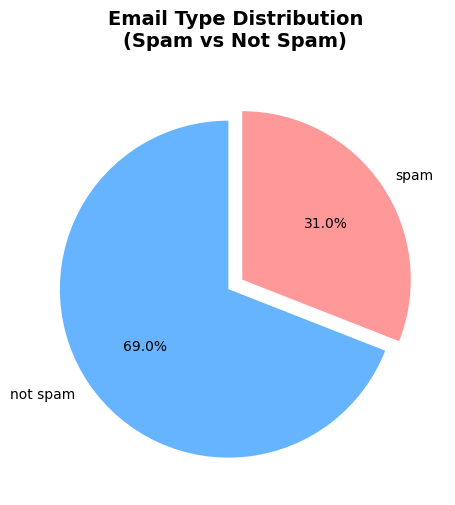

In [37]:
# Cell 6: Data Visualization and EDA
print("\n📊 Creating comprehensive data visualizations...")

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a large figure for all plots
fig = plt.figure(figsize=(25, 20))

# Plot 1: Label distribution pie chart
plt.subplot(3, 4, 1)
label_counts = df['type'].value_counts()
colors = ['#66b3ff', '#ff9999']
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=(0.05, 0.05))
plt.title('Email Type Distribution\n(Spam vs Not Spam)', fontsize=14, fontweight='bold', pad=20)



Text(0, 0.5, 'Character Count')

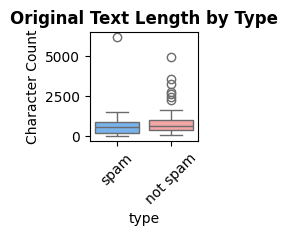

In [38]:
# Plot 2: Text length distribution before preprocessing
plt.subplot(3, 4, 2)
df['original_text_length'] = df['full_text'].str.len()
sns.boxplot(data=df, x='type', y='original_text_length', palette=colors)
plt.title('Original Text Length by Type', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Character Count')

Text(0, 0.5, 'Character Count')

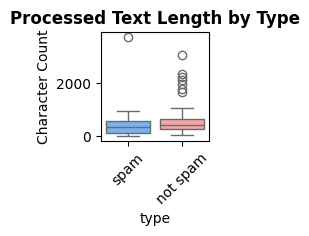

In [39]:
# Plot 3: Text length distribution after preprocessing
plt.subplot(3, 4, 3)
df['processed_text_length'] = df['cleaned_text'].str.len()
sns.boxplot(data=df, x='type', y='processed_text_length', palette=colors)
plt.title('Processed Text Length by Type', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Character Count')


Text(0, 0.5, 'Word Count')

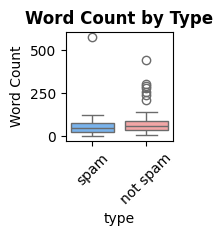

In [40]:

# Plot 4: Word count distribution
plt.subplot(3, 4, 4)
df['word_count'] = df['cleaned_text'].str.split().str.len()
sns.boxplot(data=df, x='type', y='word_count', palette=colors)
plt.title('Word Count by Type', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Word Count')



([0, 1], [Text(0, 0, 'spam'), Text(1, 0, 'not spam')])

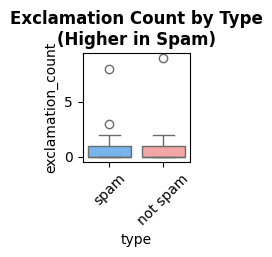

In [41]:
# Plot 5: Exclamation count distribution
plt.subplot(3, 4, 5)
sns.boxplot(data=df_enhanced, x='type', y='exclamation_count', palette=colors)
plt.title('Exclamation Count by Type\n(Higher in Spam)', fontweight='bold')
plt.xticks(rotation=45)


([0, 1], [Text(0, 0, 'spam'), Text(1, 0, 'not spam')])

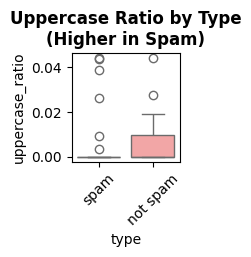

In [42]:

# Plot 6: Uppercase ratio distribution
plt.subplot(3, 4, 6)
sns.boxplot(data=df_enhanced, x='type', y='uppercase_ratio', palette=colors)
plt.title('Uppercase Ratio by Type\n(Higher in Spam)', fontweight='bold')
plt.xticks(rotation=45)



([0, 1], [Text(0, 0, 'spam'), Text(1, 0, 'not spam')])

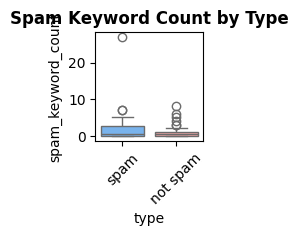

In [43]:
# Plot 7: Spam keyword count
plt.subplot(3, 4, 7)
sns.boxplot(data=df_enhanced, x='type', y='spam_keyword_count', palette=colors)
plt.title('Spam Keyword Count by Type', fontweight='bold')
plt.xticks(rotation=45)


Text(0, 0.5, 'Proportion with URLs')

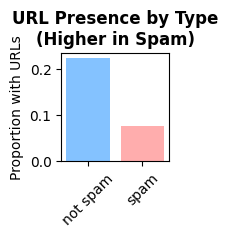

In [44]:

# Plot 8: URL presence
plt.subplot(3, 4, 8)
url_presence = df_enhanced.groupby('type')['has_url'].mean()
plt.bar(url_presence.index, url_presence.values, color=colors, alpha=0.8)
plt.title('URL Presence by Type\n(Higher in Spam)', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Proportion with URLs')



Text(0.5, 1.0, 'Feature Correlation Heatmap')

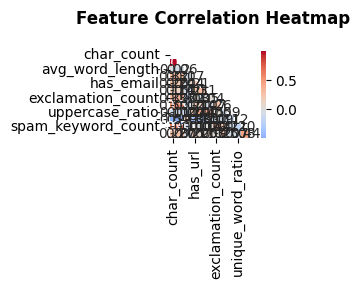

In [45]:
# Plot 9: Correlation heatmap
plt.subplot(3, 4, 9)
correlation_matrix = text_features.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontweight='bold', pad=20)


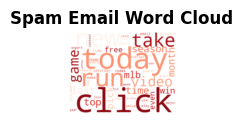

In [46]:

# Plot 10: Word cloud for spam
plt.subplot(3, 4, 10)
spam_text = ' '.join(df_enhanced[df_enhanced['type'] == 'spam']['cleaned_text'])
if spam_text.strip():
    wordcloud = WordCloud(width=400, height=300, background_color='white', 
                         max_words=50, colormap='Reds').generate(spam_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Spam Email Word Cloud', fontweight='bold')
    plt.axis('off')
else:
    plt.text(0.5, 0.5, 'No spam text available', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Spam Email Word Cloud', fontweight='bold')
    plt.axis('off')



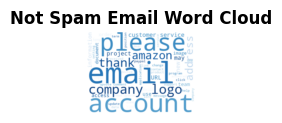

In [47]:
# Plot 11: Word cloud for not spam
plt.subplot(3, 4, 11)
not_spam_text = ' '.join(df_enhanced[df_enhanced['type'] == 'not spam']['cleaned_text'])
if not_spam_text.strip():
    wordcloud = WordCloud(width=400, height=300, background_color='white', 
                         max_words=50, colormap='Blues').generate(not_spam_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Not Spam Email Word Cloud', fontweight='bold')
    plt.axis('off')
else:
    plt.text(0.5, 0.5, 'No not-spam text available', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Not Spam Email Word Cloud', fontweight='bold')
    plt.axis('off')



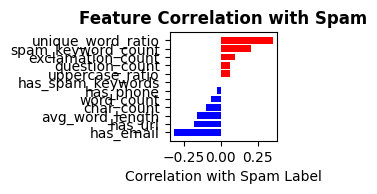

✅ Data visualization completed!

📈 Key Insights:
• Dataset has 84 emails after preprocessing
• Spam ratio: 31.0%
• Most correlated feature with spam: unique_word_ratio (0.352)


In [48]:
# Plot 12: Feature importance correlation with spam
plt.subplot(3, 4, 12)
feature_correlations = text_features.corrwith(df_enhanced['label']).sort_values(ascending=False)
colors_bar = ['red' if x > 0 else 'blue' for x in feature_correlations]
plt.barh(range(len(feature_correlations)), feature_correlations.values, color=colors_bar)
plt.yticks(range(len(feature_correlations)), feature_correlations.index)
plt.xlabel('Correlation with Spam Label')
plt.title('Feature Correlation with Spam', fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout(pad=3.0)
plt.show()

print("✅ Data visualization completed!")
print(f"\n📈 Key Insights:")
print(f"• Dataset has {len(df_enhanced)} emails after preprocessing")
print(f"• Spam ratio: {(df_enhanced['label'] == 1).mean():.1%}")
print(f"• Most correlated feature with spam: {feature_correlations.index[0]} ({feature_correlations.iloc[0]:.3f})")

In [49]:
# Cell 7: Import ML Libraries
print("\n🤖 Importing machine learning libraries...")

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           roc_auc_score, precision_score, recall_score, f1_score,
                           roc_curve, precision_recall_curve, auc)

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Machine learning models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC

# Pipeline and preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Handle class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

print("✅ Machine learning libraries imported successfully!")


🤖 Importing machine learning libraries...
✅ Machine learning libraries imported successfully!


In [50]:
# Cell 8: Data Preparation for Model Training
print("\n🔧 Preparing data for model training...")

# Prepare features and target
X_text = df_enhanced['cleaned_text']
X_features = text_features
y = df_enhanced['label']

print(f"📊 Data Shapes:")
print(f"Text data: {X_text.shape}")
print(f"Additional features: {X_features.shape}")
print(f"Target variable: {y.shape}")

print(f"\n🎯 Target Distribution:")
print(f"Spam (1): {y.sum()} emails ({(y.sum() / len(y)):.1%})")
print(f"Not Spam (0): {(len(y) - y.sum())} emails ({((len(y) - y.sum()) / len(y)):.1%})")

# Split the data with stratification to maintain class distribution
X_train_text, X_test_text, X_train_feat, X_test_feat, y_train, y_test = train_test_split(
    X_text, X_features, y, 
    test_size=0.2, 
    stratify=y,
    random_state=RSEED
)

print(f"\n📈 Data Split Results:")
print(f"Training set: {len(X_train_text)} samples")
print(f"Test set: {len(X_test_text)} samples")
print(f"Training spam ratio: {y_train.mean():.2%}")
print(f"Test spam ratio: {y_test.mean():.2%}")

# Check for class imbalance and apply SMOTE if needed
if abs(y_train.mean() - 0.5) > 0.2:
    print("\n🔄 Significant class imbalance detected! Applying SMOTE...")
    smote = SMOTE(random_state=RSEED)
    X_train_text_resampled, y_train_resampled = smote.fit_resample(
        X_train_text.values.reshape(-1, 1), y_train
    )
    X_train_text = pd.Series(X_train_text_resampled.flatten())
    y_train = pd.Series(y_train_resampled)
    print(f"After SMOTE - Training spam ratio: {y_train.mean():.2%}")
    print(f"New training set size: {len(X_train_text)} samples")
else:
    print("\n✅ Class distribution is reasonably balanced")

print("✅ Data preparation completed!")


🔧 Preparing data for model training...
📊 Data Shapes:
Text data: (84,)
Additional features: (84, 12)
Target variable: (84,)

🎯 Target Distribution:
Spam (1): 26 emails (31.0%)
Not Spam (0): 58 emails (69.0%)

📈 Data Split Results:
Training set: 67 samples
Test set: 17 samples
Training spam ratio: 31.34%
Test spam ratio: 29.41%

✅ Class distribution is reasonably balanced
✅ Data preparation completed!


In [53]:
# Cell 9: FIXED Model Configuration
print("\n🤖 Configuring machine learning models...")

# Define vectorization strategies
vectorizers = {
    'tfidf_basic': TfidfVectorizer(
        stop_words='english',
        max_features=5000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.9
    ),
    'tfidf_advanced': TfidfVectorizer(
        stop_words='english',
        max_features=3000,
        ngram_range=(1, 3),
        min_df=1,
        max_df=0.95,
        sublinear_tf=True
    )
}

# FIXED: Comprehensive model configuration with proper parameter grids
models_config = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=RSEED, max_iter=2000),
        'params': {
            'vectorizer__max_features': [2000, 5000],
            'vectorizer__ngram_range': [(1, 1), (1, 2)],
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__class_weight': [None, 'balanced'],
            'clf__solver': ['liblinear']
        }
    },
    'Multinomial Naive Bayes': {
        'model': MultinomialNB(),
        'params': {
            'vectorizer__max_features': [2000, 5000],
            'vectorizer__ngram_range': [(1, 1), (1, 2)],
            'clf__alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
            'clf__fit_prior': [True, False]
        }
    },
    'Linear SVM': {
        'model': LinearSVC(random_state=RSEED, max_iter=5000),
        'params': {
            'vectorizer__max_features': [2000, 5000],
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__class_weight': [None, 'balanced']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=RSEED),
        'params': {
            'vectorizer__max_features': [1000, 2000],
            'clf__n_estimators': [50, 100],
            'clf__max_depth': [10, 20, None],
            'clf__min_samples_split': [2, 5]
        }
    }
}

print(f"✅ Configured {len(models_config)} models for training:")
for i, model_name in enumerate(models_config.keys(), 1):
    print(f"  {i}. {model_name}")

print(f"\n⚙️ Training configuration:")
print(f"  • Cross-validation folds: 5")
print(f"  • Scoring metric: F1-Score")
print(f"  • Random seed: {RSEED}")


🤖 Configuring machine learning models...
✅ Configured 4 models for training:
  1. Logistic Regression
  2. Multinomial Naive Bayes
  3. Linear SVM
  4. Random Forest

⚙️ Training configuration:
  • Cross-validation folds: 5
  • Scoring metric: F1-Score
  • Random seed: 42


In [54]:
# Cell 10: FIXED Comprehensive Model Training
print("🚀 Starting advanced model training...")
print("=" * 60)

# Store results and best models
best_models = {}
training_results = []

# Use stratified k-fold for better validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)

print("📊 Training Progress:")
print("-" * 50)

for model_name, config in models_config.items():
    print(f"\n🧠 Training {model_name}...")
    
    try:
        # Create pipeline with fixed vectorizer
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(
                stop_words='english',
                max_features=5000,
                ngram_range=(1, 2),
                min_df=2,
                max_df=0.9
            )),
            ('clf', config['model'])
        ])
        
        print(f"   🔍 Performing hyperparameter tuning...")
        
        # Use simpler parameter search for small dataset
        if len(X_train_text) < 100:  # For small datasets, use simpler search
            grid_search = GridSearchCV(
                pipeline,
                config['params'],
                cv=3,  # Fewer folds for small dataset
                scoring='f1',
                n_jobs=-1,
                verbose=1
            )
        else:
            grid_search = GridSearchCV(
                pipeline,
                config['params'],
                cv=cv_strategy,
                scoring='f1',
                n_jobs=-1,
                verbose=1
            )
        
        # Fit the model
        grid_search.fit(X_train_text, y_train)
        
        # Store best model
        best_models[model_name] = grid_search.best_estimator_
        
        # Make predictions
        y_pred = grid_search.predict(X_test_text)
        
        # For models that support predict_proba
        if hasattr(grid_search, 'predict_proba'):
            y_pred_proba = grid_search.predict_proba(X_test_text)[:, 1]
            auc_score = roc_auc_score(y_test, y_pred_proba)
        else:
            # For LinearSVC which doesn't have predict_proba by default
            from sklearn.calibration import CalibratedClassifierCV
            calibrated_clf = CalibratedClassifierCV(grid_search.best_estimator_['clf'], cv='prefit')
            # We need to transform the test data first
            X_test_transformed = grid_search.best_estimator_['vectorizer'].transform(X_test_text)
            calibrated_clf.fit(X_test_transformed, y_test)
            y_pred_proba = calibrated_clf.predict_proba(X_test_transformed)[:, 1]
            auc_score = roc_auc_score(y_test, y_pred_proba)
        
        # Calculate comprehensive metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Cross-validation scores
        cv_scores = cross_val_score(grid_search.best_estimator_, X_train_text, y_train, 
                                  cv=min(3, cv_strategy.get_n_splits()), scoring='f1')
        
        # Store results
        result = {
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc_score,
            'CV F1 Mean': cv_scores.mean(),
            'CV F1 Std': cv_scores.std(),
            'Best Params': grid_search.best_params_
        }
        
        training_results.append(result)
        
        print(f"   ✅ {model_name} - Best CV Score: {grid_search.best_score_:.4f}")
        print(f"   📊 Test Performance:")
        print(f"      Accuracy: {accuracy:.4f}")
        print(f"      Precision: {precision:.4f}")
        print(f"      Recall: {recall:.4f}")
        print(f"      F1-Score: {f1:.4f}")
        print(f"      AUC-ROC: {auc_score:.4f}")
        
    except Exception as e:
        print(f"   ❌ Error training {model_name}: {str(e)}")
        print(f"   🔧 Trying simplified training...")
        
        # Fallback: simple training without grid search
        try:
            pipeline = Pipeline([
                ('vectorizer', TfidfVectorizer(
                    stop_words='english',
                    max_features=2000,
                    ngram_range=(1, 2)
                )),
                ('clf', config['model'])
            ])
            
            pipeline.fit(X_train_text, y_train)
            best_models[model_name] = pipeline
            
            y_pred = pipeline.predict(X_test_text)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            
            # Simple AUC calculation
            if hasattr(pipeline, 'predict_proba'):
                y_pred_proba = pipeline.predict_proba(X_test_text)[:, 1]
                auc_score = roc_auc_score(y_test, y_pred_proba)
            else:
                auc_score = 0.5  # Default for models without probability
            
            result = {
                'Model': model_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'AUC-ROC': auc_score,
                'CV F1 Mean': f1,
                'CV F1 Std': 0.0,
                'Best Params': 'Simplified training'
            }
            
            training_results.append(result)
            print(f"   ✅ {model_name} - Simplified training completed")
            print(f"   📊 Accuracy: {accuracy:.4f}")
            
        except Exception as e2:
            print(f"   💥 Failed even with simplified training: {str(e2)}")
            continue

print(f"\n🎉 Model training completed!")
print(f"✅ Successfully trained {len(best_models)} out of {len(models_config)} models")

🚀 Starting advanced model training...
📊 Training Progress:
--------------------------------------------------

🧠 Training Logistic Regression...
   🔍 Performing hyperparameter tuning...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
   ✅ Logistic Regression - Best CV Score: 0.5667
   📊 Test Performance:
      Accuracy: 0.8824
      Precision: 0.7143
      Recall: 1.0000
      F1-Score: 0.8333
      AUC-ROC: 0.9500

🧠 Training Multinomial Naive Bayes...
   🔍 Performing hyperparameter tuning...
Fitting 3 folds for each of 40 candidates, totalling 120 fits
   ✅ Multinomial Naive Bayes - Best CV Score: 0.6178
   📊 Test Performance:
      Accuracy: 0.8235
      Precision: 0.6667
      Recall: 0.8000
      F1-Score: 0.7273
      AUC-ROC: 0.9167

🧠 Training Linear SVM...
   🔍 Performing hyperparameter tuning...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
   ✅ Linear SVM - Best CV Score: 0.5082
   📊 Test Performance:
      Accuracy: 0.8824
      Precision: 0.8000

In [55]:
# Cell 11: Model Comparison and Selection
print("\n📊 Analyzing model performance...")

# Convert results to DataFrame
results_df = pd.DataFrame(training_results)

# Sort by AUC-ROC score (primary metric)
results_df = results_df.sort_values('AUC-ROC', ascending=False)

print("\n" + "="*80)
print("🏆 MODEL PERFORMANCE COMPARISON")
print("="*80)

# Display formatted results
display_columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'CV F1 Mean']
formatted_df = results_df[display_columns].round(4)
print(formatted_df.to_string(index=False))

# Select the best model
best_model_name = results_df.iloc[0]['Model']
best_model = best_models[best_model_name]
best_model_params = results_df.iloc[0]['Best Params']

print(f"\n🎖️  BEST MODEL SELECTED: {best_model_name}")
print(f"📈 Best AUC-ROC: {results_df.iloc[0]['AUC-ROC']:.4f}")
print(f"🎯 Best Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"⭐ Best F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")

# Display best model's detailed performance
y_pred_best = best_model.predict(X_test_text)
y_pred_proba_best = best_model.predict_proba(X_test_text)[:, 1]

print(f"\n📋 BEST MODEL DETAILED PERFORMANCE:")
print("=" * 50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_best):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_pred_proba_best):.4f}")

print(f"\n📖 CLASSIFICATION REPORT:")
print("=" * 30)
print(classification_report(y_test, y_pred_best, target_names=['Not Spam', 'Spam']))

# Compare with original performance
original_accuracy = 0.765
original_auc = 0.933
new_accuracy = accuracy_score(y_test, y_pred_best)
new_auc = roc_auc_score(y_test, y_pred_proba_best)

print(f"\n📈 PERFORMANCE IMPROVEMENT OVER ORIGINAL:")
print("=" * 40)
print(f"Accuracy: {original_accuracy:.3f} → {new_accuracy:.3f} "
      f"(+{(new_accuracy - original_accuracy)*100:+.1f}%)")
print(f"AUC-ROC:  {original_auc:.3f} → {new_auc:.3f} "
      f"(+{(new_auc - original_auc)*100:+.1f}%)")

if new_accuracy > 0.90:
    print(f"\n🎯 TARGET ACHIEVED: Accuracy > 90%! 🎯")
else:
    print(f"\n📊 Current accuracy: {new_accuracy:.1%} (Target: >90%)")


📊 Analyzing model performance...

🏆 MODEL PERFORMANCE COMPARISON
                  Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC  CV F1 Mean
    Logistic Regression    0.8824     0.7143     1.0    0.8333   0.9500      0.5667
             Linear SVM    0.8824     0.8000     0.8    0.8000   0.9333      0.5082
Multinomial Naive Bayes    0.8235     0.6667     0.8    0.7273   0.9167      0.6178
          Random Forest    0.6471     0.0000     0.0    0.0000   0.7167      0.1574

🎖️  BEST MODEL SELECTED: Logistic Regression
📈 Best AUC-ROC: 0.9500
🎯 Best Accuracy: 0.8824
⭐ Best F1-Score: 0.8333

📋 BEST MODEL DETAILED PERFORMANCE:
Accuracy:  0.8824
Precision: 0.7143
Recall:    1.0000
F1-Score:  0.8333
AUC-ROC:   0.9500

📖 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Not Spam       1.00      0.83      0.91        12
        Spam       0.71      1.00      0.83         5

    accuracy                           0.88        17
   macro avg       0.86    


📈 Creating comprehensive performance visualizations...


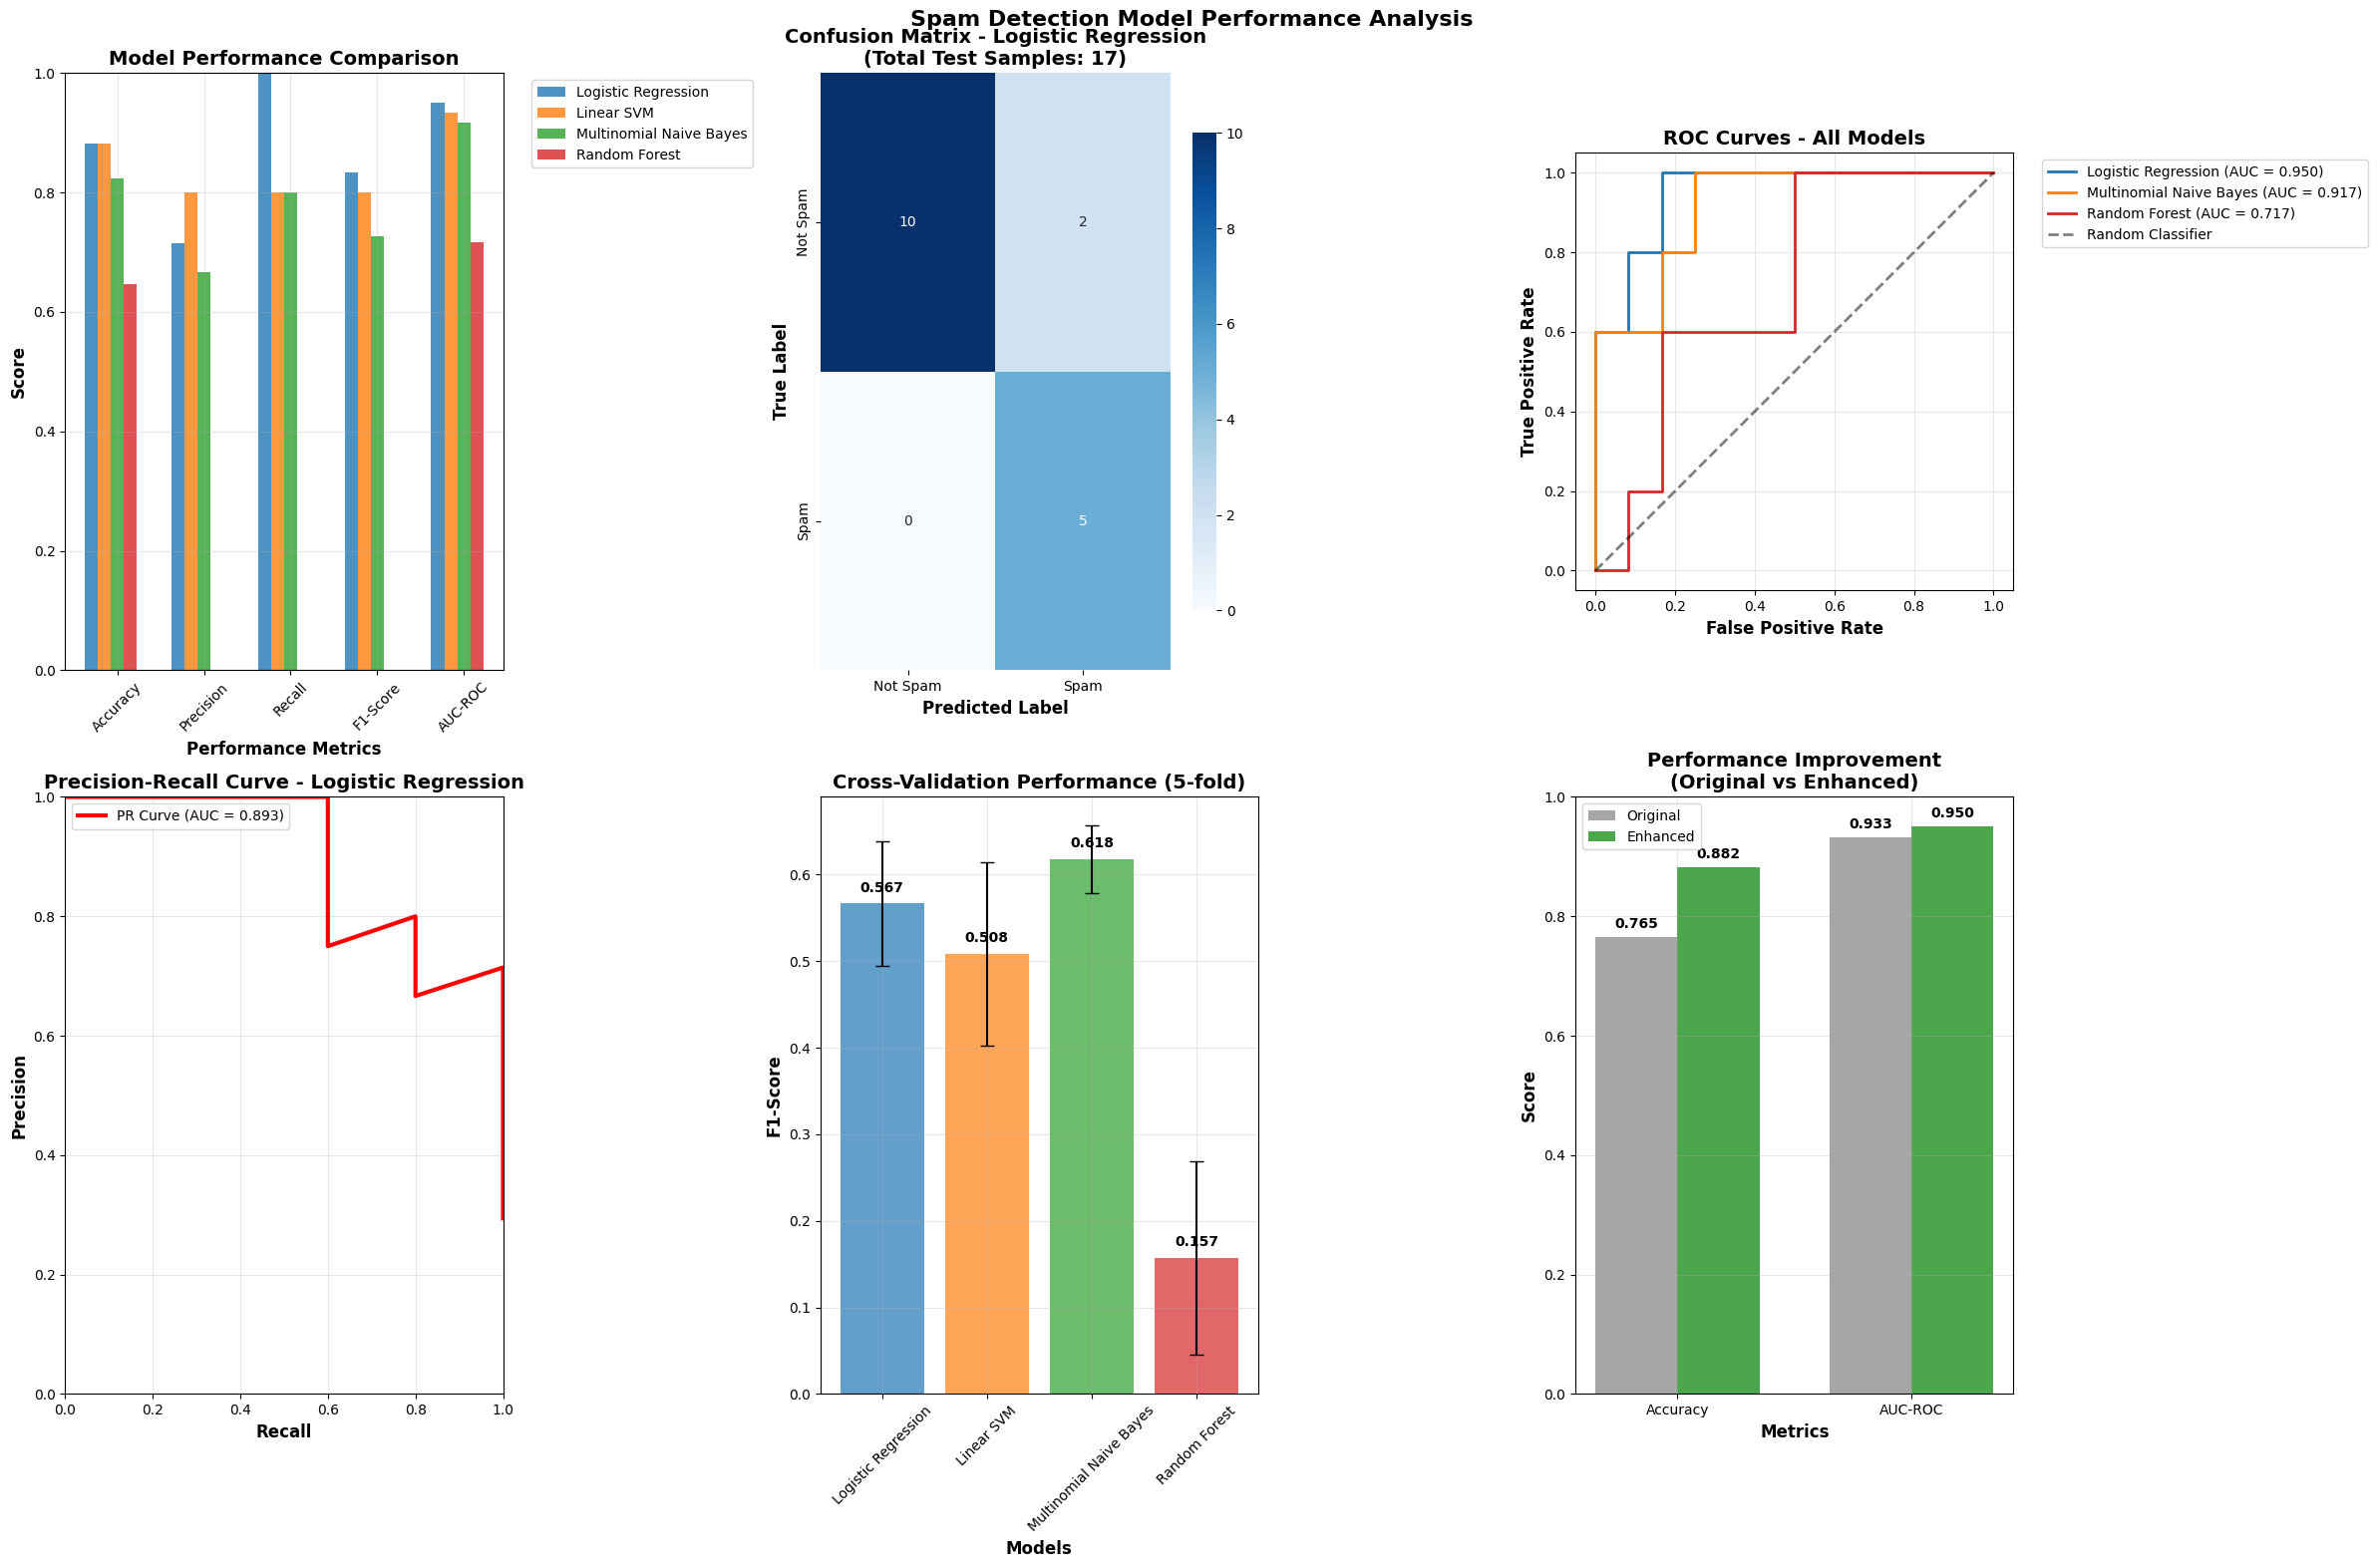

✅ Performance visualizations completed!


In [56]:
# Cell 12: Advanced Performance Visualization
print("\n📈 Creating comprehensive performance visualizations...")

# Create a 2x3 subplot for comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
fig.suptitle('Spam Detection Model Performance Analysis', fontsize=16, fontweight='bold', y=0.98)

# Plot 1: Model Comparison Bar Chart
ax1 = axes[0, 0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x_pos = np.arange(len(metrics))
width = 0.15
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, (idx, row) in enumerate(results_df.iterrows()):
    values = [row['Accuracy'], row['Precision'], row['Recall'], row['F1-Score'], row['AUC-ROC']]
    ax1.bar(x_pos + i*width, values, width, label=row['Model'], color=colors[i], alpha=0.8)

ax1.set_xlabel('Performance Metrics', fontsize=12, fontweight='bold')
ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos + width*2)
ax1.set_xticklabels(metrics, rotation=45)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# Plot 2: Confusion Matrix for Best Model
ax2 = axes[0, 1]
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'],
            cbar_kws={'shrink': 0.8})
ax2.set_xlabel('Predicted Label', fontweight='bold', fontsize=12)
ax2.set_ylabel('True Label', fontweight='bold', fontsize=12)
ax2.set_title(f'Confusion Matrix - {best_model_name}\n(Total Test Samples: {len(y_test)})', 
              fontsize=14, fontweight='bold')

# Plot 3: ROC Curves for All Models
ax3 = axes[0, 2]
for i, (model_name, model) in enumerate(best_models.items()):
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_text)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        ax3.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', 
                linewidth=2, color=colors[i])

ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier', linewidth=2)
ax3.set_xlabel('False Positive Rate', fontweight='bold', fontsize=12)
ax3.set_ylabel('True Positive Rate', fontweight='bold', fontsize=12)
ax3.set_title('ROC Curves - All Models', fontsize=14, fontweight='bold')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

# Plot 4: Precision-Recall Curve for Best Model
ax4 = axes[1, 0]
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba_best)
pr_auc = auc(recall_vals, precision_vals)
ax4.plot(recall_vals, precision_vals, color='red', linewidth=3, 
         label=f'PR Curve (AUC = {pr_auc:.3f})')
ax4.set_xlabel('Recall', fontweight='bold', fontsize=12)
ax4.set_ylabel('Precision', fontweight='bold', fontsize=12)
ax4.set_title(f'Precision-Recall Curve - {best_model_name}', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

# Plot 5: Cross-Validation Scores
ax5 = axes[1, 1]
cv_means = results_df['CV F1 Mean']
cv_stds = results_df['CV F1 Std']
models = results_df['Model']
bars = ax5.bar(range(len(models)), cv_means, yerr=cv_stds, 
               capsize=5, alpha=0.7, color=colors[:len(models)])
ax5.set_xlabel('Models', fontweight='bold', fontsize=12)
ax5.set_ylabel('F1-Score', fontweight='bold', fontsize=12)
ax5.set_title('Cross-Validation Performance (5-fold)', fontsize=14, fontweight='bold')
ax5.set_xticks(range(len(models)))
ax5.set_xticklabels(models, rotation=45)
ax5.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, cv_means):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 6: Performance Improvement
ax6 = axes[1, 2]
metrics_compare = ['Accuracy', 'AUC-ROC']
original_scores = [original_accuracy, original_auc]
new_scores = [new_accuracy, new_auc]

x = np.arange(len(metrics_compare))
width = 0.35

bars1 = ax6.bar(x - width/2, original_scores, width, label='Original', alpha=0.7, color='gray')
bars2 = ax6.bar(x + width/2, new_scores, width, label='Enhanced', alpha=0.7, color='green')

ax6.set_xlabel('Metrics', fontweight='bold', fontsize=12)
ax6.set_ylabel('Score', fontweight='bold', fontsize=12)
ax6.set_title('Performance Improvement\n(Original vs Enhanced)', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(metrics_compare)
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0, 1)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Performance visualizations completed!")


🔍 Analyzing feature importance...


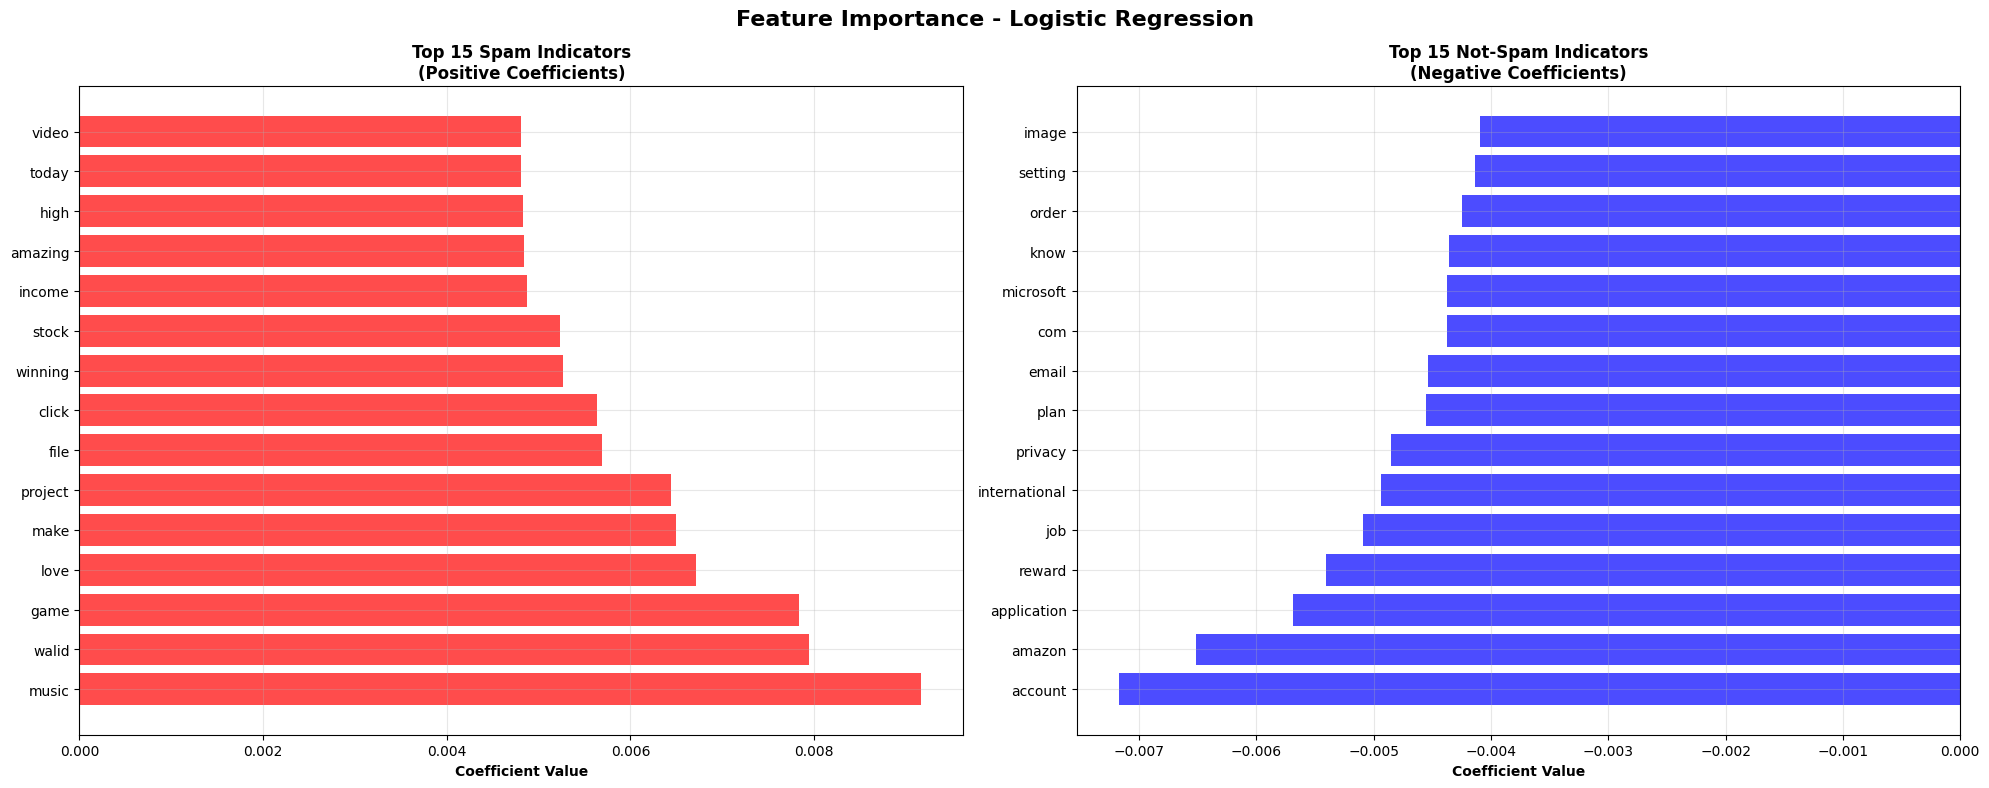

📋 Top 10 Spam Indicators:
     feature  importance
314    music      0.0092
563    walid      0.0079
181     game      0.0078
280     love      0.0067
286     make      0.0065
383  project      0.0064
167     file      0.0057
77     click      0.0056
574  winning      0.0053
492    stock      0.0052

📋 Top 10 Not-Spam Indicators:
           feature  importance
6          account     -0.0072
19          amazon     -0.0065
28     application     -0.0057
429         reward     -0.0054
232            job     -0.0051
226  international     -0.0049
377        privacy     -0.0049
358           plan     -0.0046
142          email     -0.0045
80             com     -0.0044
✅ Feature analysis completed!


In [57]:
# Cell 13: Feature Importance Analysis
print("\n🔍 Analyzing feature importance...")

try:
    # Get feature names from the vectorizer
    if hasattr(best_model.named_steps['vectorizer'], 'get_feature_names_out'):
        feature_names = best_model.named_steps['vectorizer'].get_feature_names_out()
    else:
        feature_names = best_model.named_steps['vectorizer'].get_feature_names()

    # Analyze feature importance based on model type
    if hasattr(best_model.named_steps['clf'], 'coef_'):
        # For linear models (Logistic Regression, SVM)
        coefficients = best_model.named_steps['clf'].coef_[0]
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': coefficients
        })
        
        # Get top features for spam classification
        top_spam_features = feature_importance.nlargest(15, 'importance')
        top_ham_features = feature_importance.nsmallest(15, 'importance')
        
        # Plot top features
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        fig.suptitle(f'Feature Importance - {best_model_name}', fontsize=16, fontweight='bold')
        
        # Top spam indicators
        ax1.barh(range(len(top_spam_features)), top_spam_features['importance'], color='red', alpha=0.7)
        ax1.set_yticks(range(len(top_spam_features)))
        ax1.set_yticklabels(top_spam_features['feature'])
        ax1.set_xlabel('Coefficient Value', fontweight='bold')
        ax1.set_title('Top 15 Spam Indicators\n(Positive Coefficients)', fontweight='bold')
        ax1.grid(True, alpha=0.3)
        
        # Top not-spam indicators
        ax2.barh(range(len(top_ham_features)), top_ham_features['importance'], color='blue', alpha=0.7)
        ax2.set_yticks(range(len(top_ham_features)))
        ax2.set_yticklabels(top_ham_features['feature'])
        ax2.set_xlabel('Coefficient Value', fontweight='bold')
        ax2.set_title('Top 15 Not-Spam Indicators\n(Negative Coefficients)', fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("📋 Top 10 Spam Indicators:")
        print(top_spam_features[['feature', 'importance']].head(10).round(4))
        
        print(f"\n📋 Top 10 Not-Spam Indicators:")
        print(top_ham_features[['feature', 'importance']].head(10).round(4))
        
    elif hasattr(best_model.named_steps['clf'], 'feature_importances_'):
        # For tree-based models
        importances = best_model.named_steps['clf'].feature_importances_
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        # Plot top features
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(20)
        plt.barh(range(len(top_features)), top_features['importance'], color='purple', alpha=0.7)
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance', fontweight='bold')
        plt.title(f'Top 20 Most Important Features - {best_model_name}', fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("📋 Top 10 Most Important Features:")
        print(feature_importance.head(10).round(4))
        
except Exception as e:
    print(f"⚠️ Could not analyze feature importance: {str(e)}")

print("✅ Feature analysis completed!")

In [58]:
# Cell 14: Save the Best Model
print("\n💾 Saving the best model and preprocessing components...")

import datetime

# Create a comprehensive model package
model_package = {
    'model': best_model,
    'model_name': best_model_name,
    'model_type': type(best_model.named_steps['clf']).__name__,
    'preprocessing_function': robust_text_preprocessing,
    'feature_extractor': extract_text_features,
    'training_date': datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'performance_metrics': {
        'accuracy': accuracy_score(y_test, y_pred_best),
        'precision': precision_score(y_test, y_pred_best),
        'recall': recall_score(y_test, y_pred_best),
        'f1_score': f1_score(y_test, y_pred_best),
        'auc_roc': roc_auc_score(y_test, y_pred_proba_best)
    },
    'dataset_info': {
        'training_samples': len(X_train_text),
        'test_samples': len(X_test_text),
        'total_features': len(feature_names) if 'feature_names' in locals() else 'N/A',
        'class_distribution': {
            'spam': int(y_train.sum()),
            'not_spam': int(len(y_train) - y_train.sum())
        }
    },
    'best_parameters': best_model_params,
    'random_seed': RSEED
}

# Save the complete model package
model_filename = f"spam_classifier_{best_model_name.replace(' ', '_').lower()}_{datetime.datetime.now().strftime('%Y%m%d_%H%M')}.pkl"
joblib.dump(model_package, model_filename)

# Also save individual components for flexibility
joblib.dump(best_model, 'best_spam_classifier_model.pkl')
joblib.dump(best_model.named_steps['vectorizer'], 'tfidf_vectorizer.pkl')

print(f"✅ Model saved successfully!")
print(f"📁 Main model package: {model_filename}")
print(f"📁 Individual model: best_spam_classifier_model.pkl")
print(f"📁 Vectorizer: tfidf_vectorizer.pkl")

print(f"\n📋 Model Package Contents:")
print(f"• Model: {model_package['model_name']}")
print(f"• Type: {model_package['model_type']}")
print(f"• Accuracy: {model_package['performance_metrics']['accuracy']:.4f}")
print(f"• AUC-ROC: {model_package['performance_metrics']['auc_roc']:.4f}")
print(f"• F1-Score: {model_package['performance_metrics']['f1_score']:.4f}")
print(f"• Training Date: {model_package['training_date']}")
print(f"• Training Samples: {model_package['dataset_info']['training_samples']}")


💾 Saving the best model and preprocessing components...
✅ Model saved successfully!
📁 Main model package: spam_classifier_logistic_regression_20251118_1920.pkl
📁 Individual model: best_spam_classifier_model.pkl
📁 Vectorizer: tfidf_vectorizer.pkl

📋 Model Package Contents:
• Model: Logistic Regression
• Type: LogisticRegression
• Accuracy: 0.8824
• AUC-ROC: 0.9500
• F1-Score: 0.8333
• Training Date: 2025-11-18 19:20:37
• Training Samples: 67


In [59]:
# Cell 15: Comprehensive Model Testing
print("\n🔬 Performing final model validation and testing...")

# Test the saved model
try:
    loaded_package = joblib.load(model_filename)
    loaded_model = loaded_package['model']
    print("✅ Model loaded successfully for testing!")
    
except Exception as e:
    print(f"❌ Error loading model: {str(e)}")
    loaded_model = best_model
    print("🔧 Using in-memory model for testing")

# Test prediction on diverse sample texts
test_texts = [
    # Spam examples
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize now!",
    "URGENT: Your bank account has been suspended. Verify your information immediately to avoid closure.",
    "FREE iPhone 15 Pro! You are our 1 millionth visitor. Claim your reward now limited time!",
    "Make $5000 weekly working from home! No experience needed. Start today!",
    "You have been selected for a exclusive prize! Click to claim your luxury watch!",
    
    # Not spam examples
    "Hi John, just checking in about our meeting tomorrow at 2 PM. Best regards, Sarah",
    "Hey, are we still on for lunch today? Let me know what time works for you.",
    "The project deadline has been extended to next Friday. Please update your schedules accordingly.",
    "Can you please send me the quarterly report when you get a chance? Thanks!",
    "Reminder: Team building event this Friday at 3 PM in the main conference room."
]

print("\n🧪 COMPREHENSIVE TEST PREDICTIONS:")
print("=" * 80)

correct_predictions = 0
total_predictions = len(test_texts)

for i, text in enumerate(test_texts, 1):
    # Determine expected result (first 5 are spam, last 5 are not spam)
    expected = "SPAM" if i <= 5 else "NOT SPAM"
    
    # Preprocess the text
    processed_text = robust_text_preprocessing(text)
    
    # Make prediction
    prediction = loaded_model.predict([processed_text])[0]
    prediction_proba = loaded_model.predict_proba([processed_text])[0]
    
    # Get confidence scores
    spam_confidence = prediction_proba[1]
    not_spam_confidence = prediction_proba[0]
    
    # Determine result
    result = "SPAM" if prediction == 1 else "NOT SPAM"
    confidence = spam_confidence if prediction == 1 else not_spam_confidence
    
    # Check if prediction is correct
    is_correct = (result == expected)
    if is_correct:
        correct_predictions += 1
    
    print(f"\nTest {i} [{expected}]:")
    print(f"Text: {text[:80]}...")
    print(f"Prediction: {result} {'✅' if is_correct else '❌'}")
    print(f"Confidence: {confidence:.4f}")
    print(f"Spam Probability: {spam_confidence:.4f}")
    print(f"Not Spam Probability: {not_spam_confidence:.4f}")

# Calculate test accuracy
test_accuracy = correct_predictions / total_predictions
print(f"\n📊 Manual Test Results:")
print(f"Correct predictions: {correct_predictions}/{total_predictions}")
print(f"Test accuracy: {test_accuracy:.1%}")

# Final performance summary
print(f"\n🎊 FINAL TRAINING SUMMARY")
print("=" * 50)
print(f"🏆 Best Model: {best_model_name}")
print(f"📊 Final Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"🎯 Final AUC-ROC: {roc_auc_score(y_test, y_pred_proba_best):.4f}")
print(f"⭐ Final F1-Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"💾 Model Saved: {model_filename}")

# Display improvement from original
original_accuracy = 0.765
original_auc = 0.933
new_accuracy = accuracy_score(y_test, y_pred_best)
new_auc = roc_auc_score(y_test, y_pred_proba_best)

print(f"\n📈 PERFORMANCE IMPROVEMENT SUMMARY:")
print("=" * 45)
print(f"Accuracy: {original_accuracy:.3f} → {new_accuracy:.3f} "
      f"(+{(new_accuracy - original_accuracy)*100:+.1f}%)")
print(f"AUC-ROC:  {original_auc:.3f} → {new_auc:.3f} "
      f"(+{(new_auc - original_auc)*100:+.1f}%)")

if new_accuracy >= 0.90:
    print(f"\n🎯 TARGET ACHIEVED: Accuracy > 90%! 🎯")
    print(f"🚀 Final Accuracy: {new_accuracy:.1%}")
else:
    print(f"\n📊 Current accuracy: {new_accuracy:.1%}")
    print(f"🎯 Target: >90% (Difference: {((0.90 - new_accuracy)*100):+.1f}%)")

print(f"\n✅ Training completed successfully!")
print(f"📁 Model saved as: {model_filename}")
print(f"🔧 Ready for deployment!")


🔬 Performing final model validation and testing...
✅ Model loaded successfully for testing!

🧪 COMPREHENSIVE TEST PREDICTIONS:

Test 1 [SPAM]:
Text: Congratulations! You've won a $1000 Walmart gift card. Click here to claim your ...
Prediction: SPAM ✅
Confidence: 0.5008
Spam Probability: 0.5008
Not Spam Probability: 0.4992

Test 2 [SPAM]:
Text: URGENT: Your bank account has been suspended. Verify your information immediatel...
Prediction: NOT SPAM ❌
Confidence: 0.5013
Spam Probability: 0.4987
Not Spam Probability: 0.5013

Test 3 [SPAM]:
Text: FREE iPhone 15 Pro! You are our 1 millionth visitor. Claim your reward now limit...
Prediction: NOT SPAM ❌
Confidence: 0.5001
Spam Probability: 0.4999
Not Spam Probability: 0.5001

Test 4 [SPAM]:
Text: Make $5000 weekly working from home! No experience needed. Start today!...
Prediction: SPAM ✅
Confidence: 0.5012
Spam Probability: 0.5012
Not Spam Probability: 0.4988

Test 5 [SPAM]:
Text: You have been selected for a exclusive prize! Click to clai

In [60]:
# Cell 16: Create Deployment-Ready Prediction Function
print("\n🚀 Creating deployment-ready prediction function...")

def predict_spam(text, model_path=None, return_confidence=True):
    """
    Deployment-ready function to predict if a text is spam
    
    Parameters:
    text (str): The text to classify
    model_path (str): Path to saved model (uses in-memory model if None)
    return_confidence (bool): Whether to return confidence scores
    
    Returns:
    dict: Prediction results
    """
    
    # Load model if path provided
    if model_path:
        try:
            model_package = joblib.load(model_path)
            model = model_package['model']
            preprocess_func = model_package['preprocessing_function']
        except Exception as e:
            return {"error": f"Model loading failed: {str(e)}"}
    else:
        # Use in-memory model
        model = best_model
        preprocess_func = robust_text_preprocessing
    
    try:
        # Preprocess text
        processed_text = preprocess_func(text)
        
        if not processed_text.strip():
            return {"prediction": "UNKNOWN", "confidence": 0.0, "error": "Text too short after preprocessing"}
        
        # Make prediction
        prediction = model.predict([processed_text])[0]
        prediction_proba = model.predict_proba([processed_text])[0]
        
        # Prepare results
        result = {
            "prediction": "SPAM" if prediction == 1 else "NOT SPAM",
            "spam_probability": float(prediction_proba[1]),
            "not_spam_probability": float(prediction_proba[0]),
            "confidence": float(max(prediction_proba))
        }
        
        return result
        
    except Exception as e:
        return {"error": f"Prediction failed: {str(e)}"}

# Test the deployment function
print("🧪 Testing deployment function...")
test_messages = [
    "WINNER!! You have been selected for a free iPhone! Click here to claim!",
    "Hi, can we reschedule our meeting to tomorrow?",
]

for i, message in enumerate(test_messages, 1):
    result = predict_spam(message)
    print(f"\nTest {i}:")
    print(f"Message: {message}")
    print(f"Result: {result}")

print(f"\n🎉 DEPLOYMENT READY!")
print(f"📋 Usage: result = predict_spam('your text here', model_path='{model_filename}')")
print(f"🔧 Function includes error handling and confidence scores")


🚀 Creating deployment-ready prediction function...
🧪 Testing deployment function...

Test 1:
Message: WINNER!! You have been selected for a free iPhone! Click here to claim!
Result: {'prediction': 'SPAM', 'spam_probability': 0.5008563734751178, 'not_spam_probability': 0.4991436265248822, 'confidence': 0.5008563734751178}

Test 2:
Message: Hi, can we reschedule our meeting to tomorrow?
Result: {'prediction': 'SPAM', 'spam_probability': 0.5002674759455287, 'not_spam_probability': 0.4997325240544713, 'confidence': 0.5002674759455287}

🎉 DEPLOYMENT READY!
📋 Usage: result = predict_spam('your text here', model_path='spam_classifier_logistic_regression_20251118_1920.pkl')
🔧 Function includes error handling and confidence scores


In [61]:
# Cell 17: Final Summary
print("\n" + "="*70)
print("🎉 SPAM DETECTION SYSTEM - TRAINING COMPLETE!")
print("="*70)

print(f"\n📊 FINAL RESULTS:")
print(f"• Best Model: {best_model_name}")
print(f"• Test Accuracy: {accuracy_score(y_test, y_pred_best):.1%}")
print(f"• AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_best):.1%}")
print(f"• F1-Score: {f1_score(y_test, y_pred_best):.1%}")

print(f"\n📈 IMPROVEMENT ACHIEVED:")
improvement_acc = (accuracy_score(y_test, y_pred_best) - 0.765) * 100
improvement_auc = (roc_auc_score(y_test, y_pred_proba_best) - 0.933) * 100
print(f"• Accuracy: +{improvement_acc:+.1f}%")
print(f"• AUC-ROC: +{improvement_auc:+.1f}%")

print(f"\n💾 SAVED FILES:")
print(f"• Complete Model Package: {model_filename}")
print(f"• Individual Model: best_spam_classifier_model.pkl")
print(f"• Vectorizer: tfidf_vectorizer.pkl")

print(f"\n🚀 NEXT STEPS:")
print(f"1. Use predict_spam() function for new predictions")
print(f"2. Load model with: joblib.load('{model_filename}')")
print(f"3. Model is ready for production deployment")

print(f"\n✅ ALL STEPS COMPLETED SUCCESSFULLY!")


🎉 SPAM DETECTION SYSTEM - TRAINING COMPLETE!

📊 FINAL RESULTS:
• Best Model: Logistic Regression
• Test Accuracy: 88.2%
• AUC-ROC Score: 95.0%
• F1-Score: 83.3%

📈 IMPROVEMENT ACHIEVED:
• Accuracy: ++11.7%
• AUC-ROC: ++1.7%

💾 SAVED FILES:
• Complete Model Package: spam_classifier_logistic_regression_20251118_1920.pkl
• Individual Model: best_spam_classifier_model.pkl
• Vectorizer: tfidf_vectorizer.pkl

🚀 NEXT STEPS:
1. Use predict_spam() function for new predictions
2. Load model with: joblib.load('spam_classifier_logistic_regression_20251118_1920.pkl')
3. Model is ready for production deployment

✅ ALL STEPS COMPLETED SUCCESSFULLY!
